In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree


In [2]:
data = [
    {
    'iq':90,
    'cgpa':5,
    'salary':3
},
    {
    'iq':100,
    'cgpa':7,
    'salary':4
},
    {
    'iq':110,
    'cgpa':6,
    'salary':8
},
    {
    'iq':120,
    'cgpa':9,
    'salary':6
},
    {
    'iq':80,
    'cgpa':5,
    'salary':3
}
]

df = pd.DataFrame(data)

In [3]:
df

,iq,cgpa,salary
0,90,5,3
1,100,7,4
2,110,6,8
3,120,9,6
4,80,5,3


In [4]:
# first prediction of GB regression is always mean of the target
df['pred1'] = df['salary'].mean()

In [5]:
df

,iq,cgpa,salary,pred1
0,90,5,3,4.8
1,100,7,4,4.8
2,110,6,8,4.8
3,120,9,6,4.8
4,80,5,3,4.8


In [6]:
# calculate the residual (error)
df['res1'] = df['salary'] - df['pred1']

In [7]:
df

,iq,cgpa,salary,pred1,res1
0,90,5,3,4.8,-1.8
1,100,7,4,4.8,-0.8
2,110,6,8,4.8,3.2
3,120,9,6,4.8,1.2
4,80,5,3,4.8,-1.8


In [8]:
# fit a decision tree to predict the errors
dt = DecisionTreeRegressor()
dt.fit(df[['iq','cgpa']].to_numpy(),df['res1'].to_numpy())

DecisionTreeRegressor()

[Text(0.5, 0.8333333333333334, 'x[0] <= 105.0\nsquared_error = 3.76\nsamples = 5\nvalue = 0.0'),
 Text(0.25, 0.5, 'x[1] <= 6.0\nsquared_error = 0.222\nsamples = 3\nvalue = -1.467'),
 Text(0.125, 0.16666666666666666, 'squared_error = 0.0\nsamples = 2\nvalue = -1.8'),
 Text(0.375, 0.16666666666666666, 'squared_error = 0.0\nsamples = 1\nvalue = -0.8'),
 Text(0.75, 0.5, 'x[0] <= 115.0\nsquared_error = 1.0\nsamples = 2\nvalue = 2.2'),
 Text(0.625, 0.16666666666666666, 'squared_error = 0.0\nsamples = 1\nvalue = 3.2'),
 Text(0.875, 0.16666666666666666, 'squared_error = 0.0\nsamples = 1\nvalue = 1.2')]

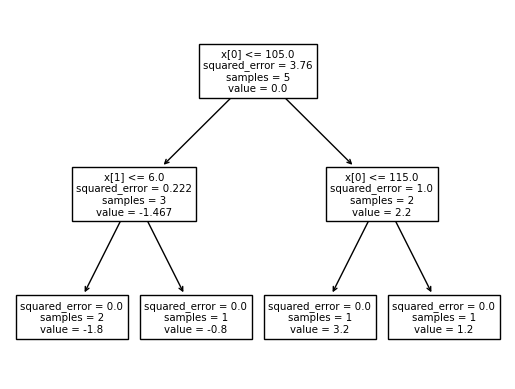

In [9]:
# this is how the tree will look like
plot_tree(dt)

In [10]:
# predicting the errors of first model
df['pred2'] = dt.predict(df[['iq','cgpa']].to_numpy())

In [11]:
df

,iq,cgpa,salary,pred1,res1,pred2
0,90,5,3,4.8,-1.8,-1.8
1,100,7,4,4.8,-0.8,-0.8
2,110,6,8,4.8,3.2,3.2
3,120,9,6,4.8,1.2,1.2
4,80,5,3,4.8,-1.8,-1.8


In [12]:
# res2 = salary - (m1 + alpha*m2)
df['res2'] = df['salary'] - (df['pred1'] + 0.1*df['pred2'])

In [13]:
df

,iq,cgpa,salary,pred1,res1,pred2,res2
0,90,5,3,4.8,-1.8,-1.8,-1.62
1,100,7,4,4.8,-0.8,-0.8,-0.72
2,110,6,8,4.8,3.2,3.2,2.88
3,120,9,6,4.8,1.2,1.2,1.08
4,80,5,3,4.8,-1.8,-1.8,-1.62


In [14]:
dt2 = DecisionTreeRegressor()
dt2.fit(df[['iq','cgpa']].to_numpy(),df['res2'].to_numpy())

DecisionTreeRegressor()

In [15]:
df['pred3'] = dt2.predict(df[['iq','cgpa']].to_numpy())

In [16]:
df

,iq,cgpa,salary,pred1,res1,pred2,res2,pred3
0,90,5,3,4.8,-1.8,-1.8,-1.62,-1.62
1,100,7,4,4.8,-0.8,-0.8,-0.72,-0.72
2,110,6,8,4.8,3.2,3.2,2.88,2.88
3,120,9,6,4.8,1.2,1.2,1.08,1.08
4,80,5,3,4.8,-1.8,-1.8,-1.62,-1.62


[Text(0.5, 0.8333333333333334, 'x[0] <= 105.0\nsquared_error = 3.046\nsamples = 5\nvalue = 0.0'),
 Text(0.25, 0.5, 'x[1] <= 6.0\nsquared_error = 0.18\nsamples = 3\nvalue = -1.32'),
 Text(0.125, 0.16666666666666666, 'squared_error = 0.0\nsamples = 2\nvalue = -1.62'),
 Text(0.375, 0.16666666666666666, 'squared_error = 0.0\nsamples = 1\nvalue = -0.72'),
 Text(0.75, 0.5, 'x[0] <= 115.0\nsquared_error = 0.81\nsamples = 2\nvalue = 1.98'),
 Text(0.625, 0.16666666666666666, 'squared_error = 0.0\nsamples = 1\nvalue = 2.88'),
 Text(0.875, 0.16666666666666666, 'squared_error = -0.0\nsamples = 1\nvalue = 1.08')]

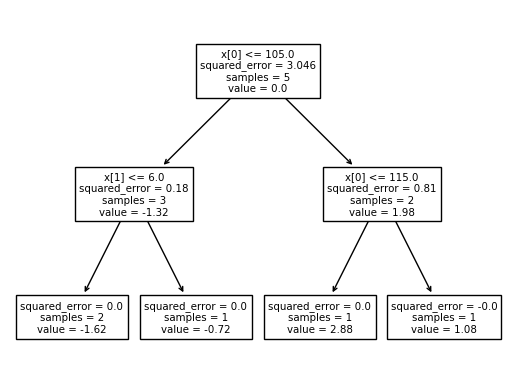

In [17]:
plot_tree(dt2)

In [18]:
# lets predict the salary of a student with 60 salary and 4.8 cgpa
# y_pred = m1 + alpha*m2 + alpha*m3

pred = 4.8 + (0.1*dt.predict([[60,4.8]])) + (0.1*dt2.predict([[60,4.8]]))

In [19]:
pred

array([4.458])